In [1]:
from model import get_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint,History,Callback  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
from model import get_model
from data import get_data,get_batch
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


[ 46522.  64228.  51072.  44442.  45867.  42278.  42535.  38880.  40008.
  37251.  66517.  89396.  66668.  66487.  66487. 100000.]


<BarContainer object of 16 artists>

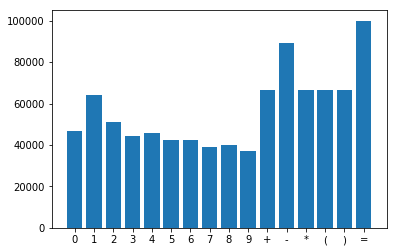

In [2]:
# 查看数据中字符的分布

train_df = pd.read_csv(
    'train.csv',
    names=['filename','label'],header=0
)

labels = ''
CHARS = ['0','1','2','3','4','5','6','7','8','9','+','-','*','(',')','=']
count = np.zeros(len(CHARS))

for label in train_df['label']:
    labels += label
    
for c in labels:
    for i,char in enumerate(CHARS):
        if c == char:
            count[i] +=  1

print(count)
plt.bar(CHARS,count)

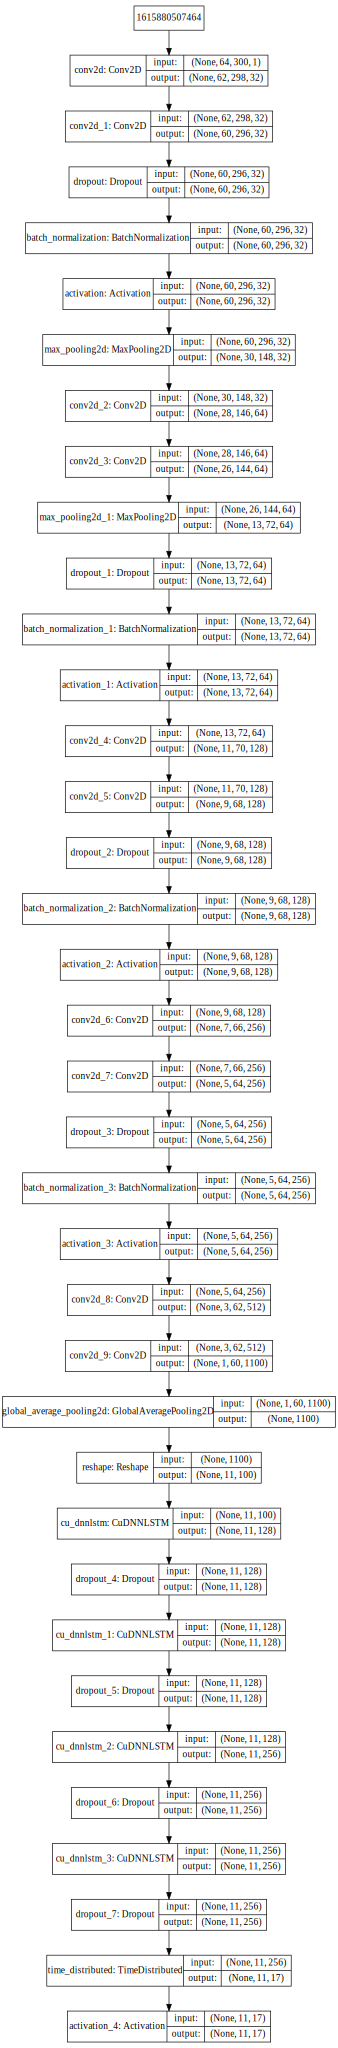

In [3]:
model = get_model()
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [4]:
# step 1 整理数据
X,y = get_data(95000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


#print(X_train[0])

#step 2 训练模型
model_version = 'alldata_lr001_v_new'
#model = get_model()
model.summary()
#model.load_weights('saved_models/weights.best.alldata_lr001_v1.hdf5')

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.{}.hdf5'.format(model_version), 
                               verbose=1, save_best_only=True)
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

batch_size = 128
history = model.fit_generator(get_batch(X_train,y_train,batch_size),
	epochs=20,
	steps_per_epoch=len(X_train)/batch_size,
	callbacks=[checkpointer],
	validation_steps=len(X_test)/batch_size,
	validation_data=get_batch(X_test, y_test,batch_size))


#保存loss和acc的图片
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./history/{}_accuracy.png'.format(model_version))

# summarize history for loss
plt.cla()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./history/{}_loss.png'.format(model_version))

#这一块脚本和train.py一样，实际操作中使用train.py  来训练这个模型，这里就不执行了

(95000,)
(95000, 11, 17)
(85500,)
(9500,)
(85500, 11, 17)
(9500, 11, 17)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 298, 32)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 296, 32)       9248      
_________________________________________________________________
dropout (Dropout)            (None, 60, 296, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 296, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 60, 296, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 148, 32)       0         
_________________________________________________________________
con

KeyboardInterrupt: 

In [7]:
X,y = get_data(nrows = 5000,skiprows=95000,isReturnImageArray=True)
#model = get_model()
model.load_weights('saved_models/weights.best.alldata_lr00001_v3.hdf5')

pre = model.predict(X)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
print(model.evaluate(X,y))
print(pre.shape)



def get_onehot_from_softmax(labels):
	onehot_arr = []
	for label in labels:
		the_label = np.zeros(labels[0].shape)
		for i,c_onehot in enumerate(label):
			the_label[i][np.argmax(c_onehot)] = 1
		onehot_arr.append(the_label)
	return np.array(onehot_arr)

def get_expressions_from_onehot(onehot):
	CHARS = ['0','1','2','3','4','5','6','7','8','9','+','-','*','(',')','=','']
	expressions = []
	for label in onehot:
		expression = ''
		for c in label:
			expression += CHARS[np.argmax(c)]
		expressions.append(expression)
	return expressions


pre_onehot = get_onehot_from_softmax(pre)
print(pre_onehot.shape)
y_expression = get_expressions_from_onehot(y)
y_pre_expression = get_expressions_from_onehot(get_onehot_from_softmax(pre))



(5000, 64, 300, 1)
(5000, 11, 17)
5000/5000 [==============================] - ETA: 2: - ETA: 1: - ETA: 36s - ETA: 26 - ETA: 21 - ETA: 17 - ETA: 15 - ETA: 14 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 7s 1ms/step
[0.0034039695507817667, 0.9993272693634033]
(5000, 11, 17)
(5000, 11, 17)


In [8]:
# 计算算式识别正确率
right = 0
wrong = []
for i,_ in enumerate(y_expression):
    if y_expression[i] == y_pre_expression[i]:
        right += 1
    else:
        wrong.append(i)
print(right)
print(right/len(y_expression))

4968
0.9936


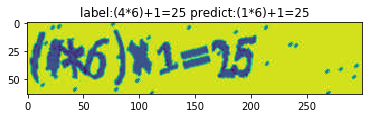

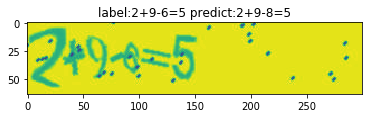

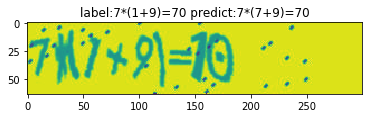

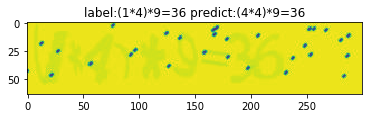

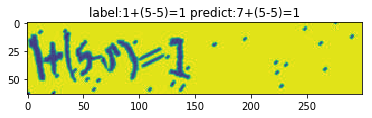

In [9]:
# 查看识别错误的情况
for i in wrong[:5]:
    plt.title("label:"+y_expression[i]+" predict:"+y_pre_expression[i])
    plt.imshow(X[i].reshape(64,300))
    plt.show()